In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 0.9

import pandas as pd
import numpy as np
import sys
import math
import importlib
from collections import Counter
stdout = sys.stdout
importlib.reload(sys)
sys.stdout = stdout

In [2]:
data = pd.read_csv("data/heart.csv", header=0, sep=",")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
n = data.shape[0]
n

303

In [4]:
age = data["age"]
pd.DataFrame({"Возраст:": age})

,Возраст:
0,63
1,37
2,41
3,56
4,57
5,57
6,56
7,44
8,52
9,57


In [5]:
frequency = Counter(age)
values = [key for key in frequency.keys()]
values.sort()
frequency = np.array([frequency[key] for key in values])
relative_frequency = np.divide(frequency.astype(float), n)
vrange = np.ptp(values)
print("Размах (максимальное - минимальное значение): {}".format(vrange))

Размах (максимальное - минимальное значение): 48


n - частота

w - относительная частота

x - величина

Дискретный ряд распределения частот и частостей случайной величины Х

In [6]:
pd.DataFrame({"n" : frequency, "x": values, "w" : relative_frequency})

,n,x,w
0,1,29,0.003300
1,2,34,0.006601
2,4,35,0.013201
3,2,37,0.006601
4,3,38,0.009901
5,4,39,0.013201
6,3,40,0.009901
7,10,41,0.033003
8,8,42,0.026403
9,8,43,0.026403


Полигон Частот

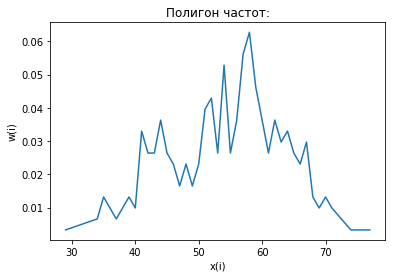

In [7]:
plt.plot(values, relative_frequency)
plt.title("Полигон частот:")
plt.xlabel("x(i)")
plt.ylabel("w(i)")
plt.show()

Эмпирическая ф-ция распределения

In [8]:
empirical_distribution_function = [sum(relative_frequency[0:index]) for index, value in enumerate(relative_frequency)]
pd.DataFrame({"x":values, "w":relative_frequency, "F(x)":empirical_distribution_function })

,x,w,F(x)
0,29,0.003300,0.000000
1,34,0.006601,0.003300
2,35,0.013201,0.009901
3,37,0.006601,0.023102
4,38,0.009901,0.029703
5,39,0.013201,0.039604
6,40,0.009901,0.052805
7,41,0.033003,0.062706
8,42,0.026403,0.095710
9,43,0.026403,0.122112


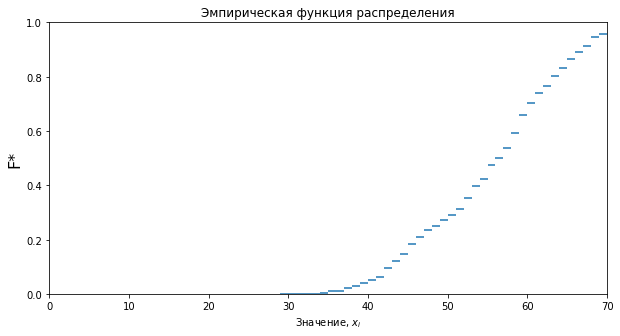

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = zip(values[0:len(values) - 1],values[1:])
ys = zip(empirical_distribution_function[0:len(values) - 1], empirical_distribution_function[0:-1])
lines = mpl.collections.LineCollection([list(zip(x, y)) for x, y in zip(xs, ys)])

ax.add_collection(lines)
ax.set_xlim(0, 70)
ax.set_ylim(0, 1)

plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение, $x_i$')
plt.ylabel('F*', fontsize=16)
plt.show()


In [10]:
medium = float(sum(values[0:len(values)]) / len(values))
print("Средняя: ", medium)
median = values[int(len(values) / 2)]
print("Медиана: ", median)

v = list(Counter(age).values())
k = list(Counter(age).keys())
mode = k[v.index(max(v))]
print("Мода: ", mode)

Средняя:  54.02439024390244
Медиана:  54
Мода:  58


In [11]:
expected_value = sum(age) / n
print("Математическое ожидание: ", expected_value)

Математическое ожидание:  54.366336633663366


In [12]:
expected_value_X_2 = 0
for x in age:
    expected_value_X_2 += x**2
# expected_value_X_2 = expected_value_X_2 / n 
expected_value_X_2 /= n 
variance = expected_value_X_2 - expected_value**2
print("Дисперсия: ", variance)
standard_deviation = np.sqrt(variance)
print("Среднее квадратичное отклонение: ", standard_deviation)

Дисперсия:  82.21233212430161
Среднее квадратичное отклонение:  9.067101638577876


In [13]:
f = sum(relative_frequency)
numerator = 0
for i in range(len(values)):
    numerator += values[i] * relative_frequency[i]
arithmetic_mean_weighted = float(numerator / f)
print("Среднее арифметическое взмешенное: ", arithmetic_mean_weighted)
central_moment_3 = 0
for i in range(len(values)):
    central_moment_3 += ((values[i] - arithmetic_mean_weighted)**3) * relative_frequency[i]
# central_moment_3 = central_moment_3 / f
central_moment_3 /= f
skewness = central_moment_3 / standard_deviation**3
print("Коэффициент ассиметрии: ", skewness)
central_moment_4 = 0
for i in range(len(values)):
    central_moment_4 += ((values[i] - arithmetic_mean_weighted)**4) * relative_frequency[i]
central_moment_4 /= f
excess = central_moment_4 /standard_deviation**4 - 3
print("Коэффициент эксцесса: ", excess)
coefficient_of_variation = standard_deviation / expected_value
print("Коэффициент вариации: ", coefficient_of_variation)
print("Центральный момент 3 порядка: ", central_moment_3)
print("Центральный момент 4 порядка: ", central_moment_4)

Среднее арифметическое взмешенное:  54.36633663366335
Коэффициент ассиметрии:  -0.2014596901125388
Коэффициент эксцесса:  -0.5529985712734575
Коэффициент вариации:  0.16677786659922883
Центральный момент 3 порядка:  -150.17360751857586
Центральный момент 4 порядка:  16538.95855953888


In [14]:
print("Размах: ", vrange)
print("Медиана: ", median)
print("Мода: ", mode)
print("Математическое ожидание: ", expected_value)
print("Дисперсия: ", variance)
print("Среднее квадратичное отклонение: ", standard_deviation)
print("Среднее арифметическое взмешенное: ", arithmetic_mean_weighted)
print("Коэффициент ассиметрии: ", skewness)
print("Коэффициент эксцесса: ", excess)
print("Коэффициент вариации: ", coefficient_of_variation)

Размах:  48
Медиана:  54
Мода:  58
Математическое ожидание:  54.366336633663366
Дисперсия:  82.21233212430161
Среднее квадратичное отклонение:  9.067101638577876
Среднее арифметическое взмешенное:  54.36633663366335
Коэффициент ассиметрии:  -0.2014596901125388
Коэффициент эксцесса:  -0.5529985712734575
Коэффициент вариации:  0.16677786659922883


Исходя из визуального представления функций распределения и частот выдвинем гипотезу, что данное распределение является Пуассоновским.

Формула ф-ции распределения Пуассона


In [15]:
theor_frequencies = []
for i in range(len(values)):
    lambda_v = expected_value
    theor_frequencies.append(((lambda_v**values[i]) / math.factorial(values[i]))*math.exp(-lambda_v))     
pd.DataFrame({"x": values, "m": relative_frequency, "$m^{'}$": theor_frequencies})

,x,m,$m^{'}$
0,29,0.003300,0.000058
1,34,0.006601,0.000832
2,35,0.013201,0.001292
3,37,0.006601,0.002867
4,38,0.009901,0.004102
5,39,0.013201,0.005719
6,40,0.009901,0.007772
7,41,0.033003,0.010306
8,42,0.026403,0.013341
9,43,0.026403,0.016867


In [16]:
theor_distribution_function = [sum(theor_frequencies[0:index]) for index, value in enumerate(theor_frequencies)]
pd.DataFrame({"x":values, "m'":theor_frequencies, "F(x)":theor_distribution_function })

,x,m',F(x)
0,29,0.000058,0.000000
1,34,0.000832,0.000058
2,35,0.001292,0.000890
3,37,0.002867,0.002183
4,38,0.004102,0.005050
5,39,0.005719,0.009152
6,40,0.007772,0.014871
7,41,0.010306,0.022643
8,42,0.013341,0.032949
9,43,0.016867,0.046290


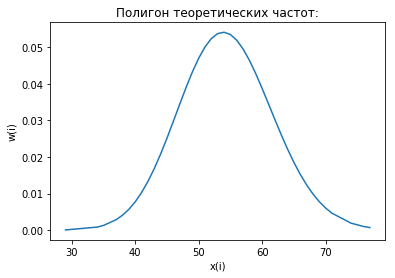

In [17]:
plt.plot(values, theor_frequencies)
plt.title("Полигон теоретических частот:")
plt.xlabel("x(i)")
plt.ylabel("w(i)")
plt.show()

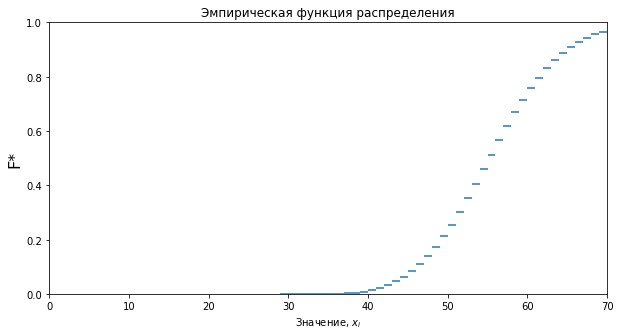

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = zip(values[0:len(values) - 1],values[1:])
ys = zip(theor_distribution_function[0:len(values) - 1], theor_distribution_function[0:-1])
lines = mpl.collections.LineCollection([list(zip(x, y)) for x, y in zip(xs, ys)])

ax.add_collection(lines)
ax.set_xlim(0, 70)
ax.set_ylim(0, 1)

plt.title('Эмпирическая функция распределения')
plt.xlabel('Значение, $x_i$')
plt.ylabel('F*', fontsize=16)
plt.show()


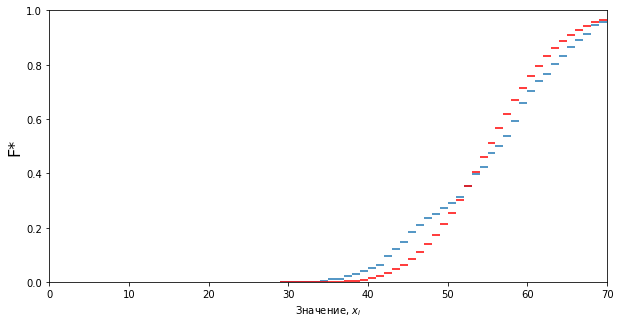

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
xs = zip(values[0:len(values) - 1],values[1:])
ys = zip(empirical_distribution_function[0:len(values) - 1], empirical_distribution_function[0:-1])
lines = mpl.collections.LineCollection([list(zip(x, y)) for x, y in zip(xs, ys)])

ax.add_collection(lines)

ax.set_xlim(0, 70)
ax.set_ylim(0, 1)
xs = zip(values[0:len(values) - 1],values[1:])
ys = zip(theor_distribution_function[0:len(values) - 1], theor_distribution_function[0:-1])
lines = mpl.collections.LineCollection([list(zip(x, y)) for x, y in zip(xs, ys)], colors=[(1,0,0,1)] * len(values))
ax.add_collection(lines)
plt.xlabel('Значение, $x_i$')
plt.ylabel('F*', fontsize=16)
plt.show()

In [20]:
t_expected_value = expected_value
print("Теор. мат. ож.: ", t_expected_value)

Теор. мат. ож.:  54.366336633663366


In [21]:
t_variance = t_expected_value
print("Теор. дисперсия: ", t_variance)

Теор. дисперсия:  54.366336633663366


In [22]:
print("Матем ож: ", expected_value)
print("Теор мат ож: ", t_expected_value)
print("Дисперсия", variance)
print("Теор дисперсия", t_variance)

Матем ож:  54.366336633663366
Теор мат ож:  54.366336633663366
Дисперсия 82.21233212430161
Теор дисперсия 54.366336633663366


### Критерий Пирсона
Для проверки на равномерное распределение вычислим критерий Пирсона:

χ2=∑(mi−m′i)^2 / m′i

In [23]:
x2 = 0
for i in range(len(theor_frequencies)):
    x2 += ((relative_frequency[i] - theor_frequencies[i])**2) / theor_frequencies[i] 
print("Критерий Пирсона: ", x2)

Критерий Пирсона:  0.5938714183030498


Число степеней свободы k = M - s - 1, где s - количество неизвестных параметров.

In [24]:
df = len(values) - 2
print("Число степеней свободы df: ", df)

Число степеней свободы df:  39


In [25]:
significance_level = 0.05
print("Уровень значимости: ", significance_level)

Уровень значимости:  0.05


In [26]:
print("Табличное Х2: ", 0.304)
print("Полученое значение: ", x2)

Табличное Х2:  0.304
Полученое значение:  0.5938714183030498


Так как вычесленное значение X2 получилось больше табличного, следовательно гипотеза H0 отклоняется и величина Х не распределена по такому закону

 ### Критерий Колмогорова

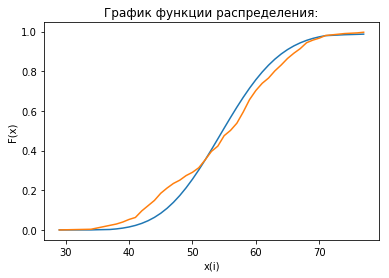

In [27]:
plt.plot(values, theor_distribution_function)
plt.plot(values, empirical_distribution_function)
plt.title("График функции распределения:")
plt.xlabel("x(i)")
plt.ylabel("F(x)")
plt.show()

In [28]:
tmp_z = []
for i in range(len(values)):
    tmp_z.append(abs(empirical_distribution_function[i] - theor_distribution_function[i]))
z = max(tmp_z)
print("Z: ", z)

Z:  0.10204305142643523


In [29]:
l = math.sqrt(n) * z
l

1.7762527005915252

In [30]:
l_table = 1,36

Так как значение l > l_table, то гипотеза отклоняется

### Критерий Ястремского
+ формула

In [31]:
J = abs(x2 - df) / math.sqrt(2*len(values) + 2.4)
print("J: ", J)

J:  4.180510400812491


Так как J > 3, то расхождение между теоретическим и фактическим распределениями существенно и его невозможно объяснить влиянием случайных факторов, поэтому теоретический закон распределения следует отклонить.

### Критерий Романовского

In [32]:
R = abs(x2 - df) / math.sqrt(2*df)
print("R: ", R)

R:  4.348637736345981


Так как R > 3, то гипотеза отвергается

# НСВ

Промышленное производство: электрические и газовые коммуникации

In [33]:
data = pd.read_csv("data/Electric_Production.csv", header=0, sep=",")
data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [34]:
n = data.shape[0]
n

397

In [35]:
index = data["IPG2211A2N"]
pd.DataFrame({"Индекс промышленного производства:": index})

,Индекс промышленного производства:
0,72.5052
1,70.6720
2,62.4502
3,57.4714
4,55.3151
5,58.0904
6,62.6202
7,63.2485
8,60.5846
9,56.3154


In [36]:
frequency = Counter(index)
values = [key for key in frequency.keys()]
values.sort()
frequency = np.array([frequency[key] for key in values])
relative_frequency = np.divide(frequency.astype(float), n)
vrange = np.ptp(values)
print("Размах (максимальное - минимальное значение): {}".format(vrange))

Размах (максимальное - минимальное значение): 74.0897


Определим шаг по формуле Стерджесса

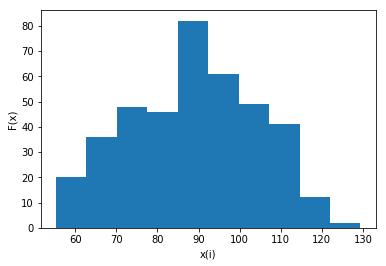

Минимальное значение: 55.3151 Максимальное значение: 129.4048 Шаг: 7.908717567234336 k: 10


In [37]:
ints, bins, patches = plt.hist(index)

min_value = np.amin(index)
max_value = np.amax(index)
vrange = max_value - min_value
h = (max_value - min_value) / (1 + 3.22 * np.log10(n)) # шаг
k = len(ints)# количество интервалов

frequency = Counter(index)
values = [key for key in frequency.keys()]
values.sort()
index = np.array(index)

mids = [(bins[i] + bins[i + 1])/2 for i in range(k)]
rel_frequencies_group = np.divide(ints, n)
plt.xlabel("x(i)")
plt.ylabel("F(x)")
plt.show()

print("Минимальное значение: {} Максимальное значение: {} Шаг: {} k: {}".format(min_value, max_value, h, k))

In [38]:
pd.DataFrame({"n":ints, "$x_a, x_b$":["[ {} ; {} ]".format(bins[i], bins[i + 1]) for i in range(k)],
              "$w_i$":rel_frequencies_group, "$x_i$":mids})

,n,"$x_a, x_b$",$w_i$,$x_i$
0,20.0,[ 55.3151 ; 62.72407 ],0.050378,59.019585
1,36.0,[ 62.72407 ; 70.13304 ],0.090680,66.428555
2,48.0,[ 70.13304 ; 77.54201 ],0.120907,73.837525
3,46.0,[ 77.54201 ; 84.95098 ],0.115869,81.246495
4,82.0,[ 84.95098 ; 92.35995 ],0.206549,88.655465
5,61.0,[ 92.35995 ; 99.76892 ],0.153652,96.064435
6,49.0,[ 99.76892 ; 107.17788999999999 ],0.123426,103.473405
7,41.0,[ 107.17788999999999 ; 114.58686 ],0.103275,110.882375
8,12.0,[ 114.58686 ; 121.99583 ],0.030227,118.291345
9,2.0,[ 121.99583 ; 129.4048 ],0.005038,125.700315


In [39]:
h

7.908717567234336

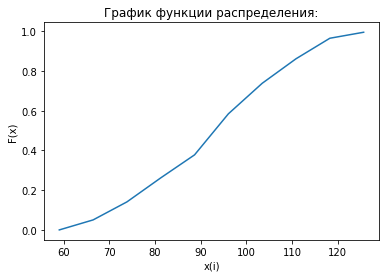

In [40]:
empirical_frequencies = [sum(rel_frequencies_group[0:index]) for index, value in enumerate(rel_frequencies_group)]
plt.plot(mids, empirical_frequencies)
plt.title("График функции распределения:")
plt.xlabel("x(i)")
plt.ylabel("F(x)")
plt.show()

In [41]:
pd.DataFrame({"n":ints, "$x_a, x_b$":["[ {} ; {} ]".format(bins[i], bins[i + 1]) for i in range(k)],
              "$w_i$":rel_frequencies_group, "$x_i$":mids, "F(x)": empirical_frequencies})

,n,"$x_a, x_b$",$w_i$,$x_i$,F(x)
0,20.0,[ 55.3151 ; 62.72407 ],0.050378,59.019585,0.000000
1,36.0,[ 62.72407 ; 70.13304 ],0.090680,66.428555,0.050378
2,48.0,[ 70.13304 ; 77.54201 ],0.120907,73.837525,0.141058
3,46.0,[ 77.54201 ; 84.95098 ],0.115869,81.246495,0.261965
4,82.0,[ 84.95098 ; 92.35995 ],0.206549,88.655465,0.377834
5,61.0,[ 92.35995 ; 99.76892 ],0.153652,96.064435,0.584383
6,49.0,[ 99.76892 ; 107.17788999999999 ],0.123426,103.473405,0.738035
7,41.0,[ 107.17788999999999 ; 114.58686 ],0.103275,110.882375,0.861461
8,12.0,[ 114.58686 ; 121.99583 ],0.030227,118.291345,0.964736
9,2.0,[ 121.99583 ; 129.4048 ],0.005038,125.700315,0.994962


In [42]:
statistical_distribution_density = []
for i in range(k):
    statistical_distribution_density.append(rel_frequencies_group[i] / (bins[i + 1] - bins[i]))
pd.DataFrame({"n":ints, "$x_a, x_b$":["[ {} ; {} )".format(bins[i], bins[i + 1]) for i in range(k)],
              "$w_i$":rel_frequencies_group, "$x_i$":mids, "F(x)": empirical_frequencies,
             "f*(x)": statistical_distribution_density})

,n,"$x_a, x_b$",$w_i$,$x_i$,F(x),f*(x)
0,20.0,[ 55.3151 ; 62.72407 ),0.050378,59.019585,0.000000,0.006800
1,36.0,[ 62.72407 ; 70.13304 ),0.090680,66.428555,0.050378,0.012239
2,48.0,[ 70.13304 ; 77.54201 ),0.120907,73.837525,0.141058,0.016319
3,46.0,[ 77.54201 ; 84.95098 ),0.115869,81.246495,0.261965,0.015639
4,82.0,[ 84.95098 ; 92.35995 ),0.206549,88.655465,0.377834,0.027878
5,61.0,[ 92.35995 ; 99.76892 ),0.153652,96.064435,0.584383,0.020739
6,49.0,[ 99.76892 ; 107.17788999999999 ),0.123426,103.473405,0.738035,0.016659
7,41.0,[ 107.17788999999999 ; 114.58686 ),0.103275,110.882375,0.861461,0.013939
8,12.0,[ 114.58686 ; 121.99583 ),0.030227,118.291345,0.964736,0.004080
9,2.0,[ 121.99583 ; 129.4048 ),0.005038,125.700315,0.994962,0.000680


In [43]:
expected_value = 0
for i in range(k):
    expected_value += mids[i] * rel_frequencies_group[i]
print("Математическое ожидание: ", expected_value)

Математическое ожидание:  88.84208892947103


In [44]:
variance = 0
for i in range(len(values)):
    variance += (values[i] - expected_value)**2
variance /= len(values)
print("Дисперсия: ", variance)

Дисперсия:  236.18901435849548


In [45]:
standard_deviation = np.sqrt(variance)
print("Среднее квадратичное отклонение: ", standard_deviation)

Среднее квадратичное отклонение:  15.368442157827692


In [46]:
mode_row = list(rel_frequencies_group).index(max(rel_frequencies_group))
mode = (bins[mode_row] + (bins[mode_row + 1] - bins[mode_row]) 
        * (rel_frequencies_group[mode_row] - rel_frequencies_group[mode_row - 1]) 
        / ((rel_frequencies_group[mode_row] - rel_frequencies_group[mode_row - 1]) 
        + (rel_frequencies_group[mode_row] - rel_frequencies_group[mode_row + 1])))
print("Мода: ", mode)

Мода:  89.63032947368421


In [47]:
mean_linear_deviation = 0
for i in range(k):
    mean_linear_deviation += (mids[i] - expected_value)**2 * rel_frequencies_group[i]
mean_linear_deviation /= sum(rel_frequencies_group)
print("Cреднее линейное отклонение: ", mean_linear_deviation)

Cреднее линейное отклонение:  241.9361130872233


In [48]:
median = bins[4] + (bins[5] - bins[4])*(sum(rel_frequencies_group)/2 - sum(rel_frequencies_group[0:4]))/rel_frequencies_group[4]
print("Медиана: ", median)

Медиана:  89.33311469512195


In [49]:
for i in range(len(mids)):
    central_moment_3 += ((mids[i] - expected_value)**3) * rel_frequencies_group[i]
central_moment_3 /= sum(rel_frequencies_group)
skewness = central_moment_3 / (standard_deviation ** 3)
print("Коэффициент ассиметрии: ", skewness)
central_moment_4 = 0
for i in range(len(mids)):
    central_moment_4 += ((mids[i] - expected_value)**4) * rel_frequencies_group[i]
central_moment_4 /= sum(rel_frequencies_group)
excess = central_moment_4/(standard_deviation**4) - 3
print("Коэффициент эксцесса: ", excess)

Коэффициент ассиметрии:  -0.10804122162420439
Коэффициент эксцесса:  -0.6387086498968433


In [50]:
print("Размах: ", vrange)
print("Медиана: ", median)
print("Мода: ", mode)
print("Математическое ожидание: ", expected_value)
print("Дисперсия: ", variance)
print("Среднее квадратичное отклонение: ", standard_deviation)
print("Среднее арифметическое взмешенное: ", arithmetic_mean_weighted)
print("Коэффициент ассиметрии: ", skewness)
print("Коэффициент эксцесса: ", excess)
print("Коэффициент вариации: ", coefficient_of_variation)
print("Центральный момент 3 порядка: ", central_moment_3)
print("Центральный момент 4 порядка: ", central_moment_4)

Размах:  74.0897
Медиана:  89.33311469512195
Мода:  89.63032947368421
Математическое ожидание:  88.84208892947103
Дисперсия:  236.18901435849548
Среднее квадратичное отклонение:  15.368442157827692
Среднее арифметическое взмешенное:  54.36633663366335
Коэффициент ассиметрии:  -0.10804122162420439
Коэффициент эксцесса:  -0.6387086498968433
Коэффициент вариации:  0.16677786659922883
Центральный момент 3 порядка:  -392.1742068017902
Центральный момент 4 порядка:  131725.2294775772


In [51]:
intergroup_variance = 0
for i in range(k):
    intergroup_variance += (mids[i] - expected_value)**2 * rel_frequencies_group[i]
intergroup_variance /= sum(rel_frequencies_group)
print("Межгрупповая дисперсия: ", intergroup_variance)

Межгрупповая дисперсия:  241.9361130872233


In [52]:
intra_group_variances = []
for i in range(k):
    intra_group_values = []
    for t in range(len(values)):
        if bins[i] < values[t] < bins[i + 1]:
            intra_group_values.append(values[t])        
    intra_group_variance = 0
    for j in range(len(intra_group_values)):
        intra_group_variance += (intra_group_values[j] - mids[i])**2
    intra_group_variance /= len(intra_group_values)   
    intra_group_variances.append(intra_group_variance)
average_intra_group_variance = np.mean(intra_group_variances)
print("Средняя внутригрупповых: ", average_intra_group_variance)

Средняя внутригрупповых:  4.528043166013785


In [53]:
general_variance = average_intra_group_variance + intergroup_variance
print("Общая дисперсия: ", general_variance)

Общая дисперсия:  246.4641562532371


In [54]:
intergroup_variance / general_variance

0.9816279850390849

Исходя из визуального представления функций распределения и частот выдвинем гипотезу, что данное распределение является Нормальным.

Проанализировав графики, выдвинем гипотезу, что данное распределение является нормальным. Для проверки гипотезы используем критерий согласия Пирсона.

Вычислим теоретические частоты по формуле для нормального распределения:

Теоретические (выравнивающие) частоты находятся по формуле

In [55]:
def v(t):
    return np.exp(-t**2/2)/math.sqrt(2*math.pi)
ni = []
for i in range(k):
    ni.append(v((mids[i] - expected_value)/standard_deviation)*sum(rel_frequencies_group)*(mids[1] - mids[0])/standard_deviation)
ni

[0.029265711049394592,
 0.06640072127627378,
 0.11941306936064079,
 0.17021439050376158,
 0.1923118450776258,
 0.172219031726774,
 0.12224232451912821,
 0.06877449407256467,
 0.030668925236869676,
 0.010840144149138503]

In [56]:
def fx(x):
    power = -(x - expected_value)**2 / (2*variance)
    result = np.exp(power)/(standard_deviation*math.sqrt(2*math.pi))
    return result
theor_frequencies_density = [fx(x) for x in mids]
pd.DataFrame({"n":ints, "$x_a, x_b$":["[ {} ; {} )".format(bins[i], bins[i + 1]) for i in range(k)],
              "$n_i$":ni, "$x_i$":mids, "f(x)": theor_frequencies_density})

,n,"$x_a, x_b$",$n_i$,$x_i$,f(x)
0,20.0,[ 55.3151 ; 62.72407 ),0.029266,59.019585,0.003950
1,36.0,[ 62.72407 ; 70.13304 ),0.066401,66.428555,0.008962
2,48.0,[ 70.13304 ; 77.54201 ),0.119413,73.837525,0.016117
3,46.0,[ 77.54201 ; 84.95098 ),0.170214,81.246495,0.022974
4,82.0,[ 84.95098 ; 92.35995 ),0.192312,88.655465,0.025957
5,61.0,[ 92.35995 ; 99.76892 ),0.172219,96.064435,0.023245
6,49.0,[ 99.76892 ; 107.17788999999999 ),0.122242,103.473405,0.016499
7,41.0,[ 107.17788999999999 ; 114.58686 ),0.068774,110.882375,0.009283
8,12.0,[ 114.58686 ; 121.99583 ),0.030669,118.291345,0.004139
9,2.0,[ 121.99583 ; 129.4048 ),0.010840,125.700315,0.001463


In [57]:
from scipy.stats import norm
rv = norm(loc=expected_value, scale=standard_deviation)
theor_frequencies = []
for i in range(k):
    theor_frequencies.append(rv.cdf(mids[i]))
pd.DataFrame({"n":ints, "$x_a, x_b$":["[ {} ; {} )".format(bins[i], bins[i + 1]) for i in range(k)],
              "$n_i$":ni, "$x_i$":mids, "f(x)": theor_frequencies_density, "F(x)": theor_frequencies})

,n,"$x_a, x_b$",$n_i$,$x_i$,f(x),F(x)
0,20.0,[ 55.3151 ; 62.72407 ),0.029266,59.019585,0.003950,0.026159
1,36.0,[ 62.72407 ; 70.13304 ),0.066401,66.428555,0.008962,0.072363
2,48.0,[ 70.13304 ; 77.54201 ),0.119413,73.837525,0.016117,0.164452
3,46.0,[ 77.54201 ; 84.95098 ),0.170214,81.246495,0.022974,0.310571
4,82.0,[ 84.95098 ; 92.35995 ),0.192312,88.655465,0.025957,0.495156
5,61.0,[ 92.35995 ; 99.76892 ),0.172219,96.064435,0.023245,0.680803
6,49.0,[ 99.76892 ; 107.17788999999999 ),0.122242,103.473405,0.016499,0.829461
7,41.0,[ 107.17788999999999 ; 114.58686 ),0.068774,110.882375,0.009283,0.924232
8,12.0,[ 114.58686 ; 121.99583 ),0.030669,118.291345,0.004139,0.972331
9,2.0,[ 121.99583 ; 129.4048 ),0.010840,125.700315,0.001463,0.991764


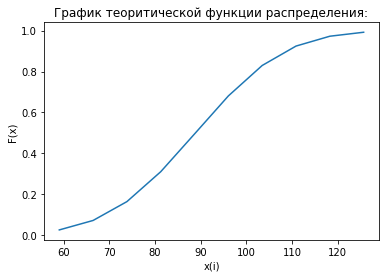

In [58]:
plt.plot(mids, theor_frequencies)
plt.title("График теоритической функции распределения:")
plt.xlabel("x(i)")
plt.ylabel("F(x)")
plt.show()

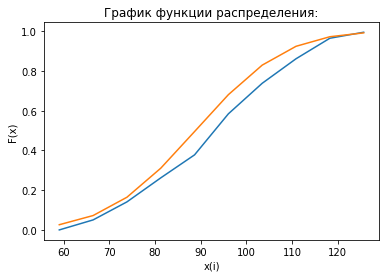

In [59]:
plt.plot(mids, empirical_frequencies)
plt.plot(mids, theor_frequencies)
plt.title("График функции распределения:")
plt.xlabel("x(i)")
plt.ylabel("F(x)")
plt.show()

Для проверки вычислим критерий Пирсона:

In [60]:
xi_2 = sum([((rel_frequencies_group[i] - theor_frequencies[i]) ** 2) 
                  / theor_frequencies[i] for i in range(len(rel_frequencies_group)) ])
print("Критерий Пирсона: ", xi_2)

Критерий Пирсона:  3.9617742567387144


In [61]:
df = k - 1 - 2
df

7

In [62]:
x_ka = 14.06714

Так как хи < хи_ка следовательно гипотеза не опровергается.

Критерий Романовского находим по формуле:

In [63]:
R = np.abs(xi_2 - k) / np.sqrt(2 * k)
print("Критерий Романовского: ", R)

Критерий Романовского:  1.3501883225421427


Полученное значение меньше 3, значит, гипотеза не опровергается.

Вычислим значение критерия Ястремского:

In [64]:
J = np.abs(xi_2 - k) / np.sqrt(2 * k + 2.4)
print("Критерий Ястремского: {}".format(J))

Критерий Ястремского: 1.2758080444821338


Полученный результат меньше 3, значит, гипотеза не опровергается.

Колмагоров:

In [65]:
tmp_z = []
for i in range(k):
    tmp_z.append(abs(empirical_frequencies[i] - theor_frequencies[i]))
z = max(tmp_z)
print("Z: ", z)

Z:  0.11732188165892549


In [66]:
l = math.sqrt(k) * z
print("Критерий Колмогорова: ",l)

Критерий Колмогорова:  0.3710043654189384


в таблице 1.36 так как наше меньше, то гипотеза не отвергается